In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
from scipy import stats
from collections import defaultdict 
import os
!pip3 install pydicom
import pydicom
from google.colab import files
uploaded = files.upload()

     |████████████████████████████████| 1.9MB 12.7MB/s 


Saving stage_2_detailed_class_info.csv to stage_2_detailed_class_info.csv
Saving stage_2_sample_submission.csv to stage_2_sample_submission.csv
Saving stage_2_train_labels.csv to stage_2_train_labels.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
classdetails = pd.read_csv("stage_2_detailed_class_info.csv")

In [5]:
classdetails.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [6]:
traindatalabels = pd.read_csv("stage_2_train_labels.csv")

In [7]:
traindatalabels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [8]:
traindatalabels['x'].fillna('0', inplace = True)
traindatalabels['y'].fillna('0', inplace = True)
traindatalabels['width'].fillna('0', inplace = True)
traindatalabels['height'].fillna('0', inplace = True)
traindatalabels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0,0,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0,0,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0,0,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1
5,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1
6,00569f44-917d-4c86-a842-81832af98c30,0,0,0,0,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,0,0,0,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695,575,162,137,1


In [9]:
traindata = pd.concat([traindatalabels,classdetails['class']], axis =1, join = "inner")

In [10]:
traindata.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0,0,0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0,0,0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0,0,0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,0,0,0,0,0,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,0,0,0,0,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,695,575,162,137,1,Lung Opacity


In [11]:
tempdata = (traindata.filter(['patientId','Target','class']))

In [13]:
tempdata.head(10)

,patientId,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,0,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity


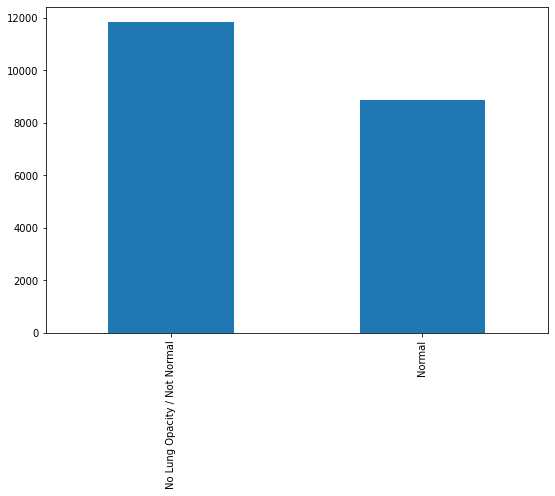

In [14]:
fig1 = tempdata[tempdata["Target"] == 0]["class"].value_counts().plot(kind = 'bar', figsize = (9,6)) 

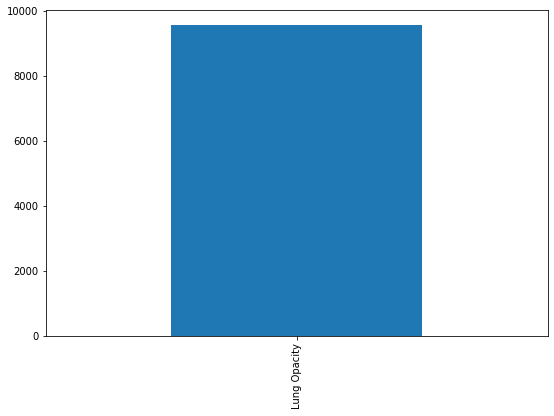

In [15]:
fig2 = tempdata[tempdata["Target"] == 1]["class"].value_counts().plot(kind = 'bar', figsize = (9,6)) 

In [16]:
Train_path = '/content/drive/My Drive/ProjectDataset/stage_2_train_images'
Test_path = '/content/drive/My Drive/ProjectDataset/stage_2_test_images'

1


Text(0.5, 0, '0')

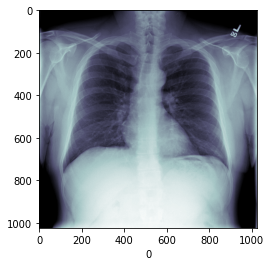

In [21]:
def readImages(folder):
  images = []
  for filename in os.listdir(folder):
    img = pydicom.dcmread(os.path.join(folder, filename))
    img_np = img.pixel_array
    if img is not None:
      images.append(img_np)
    break;
  return images
Train_df = readImages(Train_path)
print(len(Train_df))
plt.imshow(Train_df[0], cmap= plt.cm.bone )
plt.xlabel(tempdata["Target"][0])

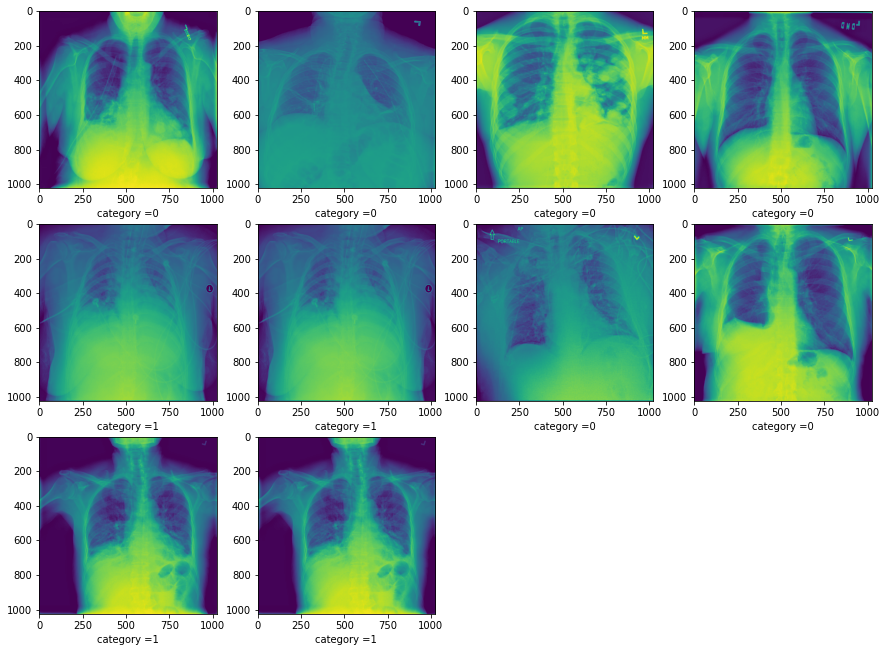

In [19]:
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.subplot(4,4,i+1)
  img = pydicom.dcmread(f'{os.path.join(Train_path, tempdata["patientId"][i])}.dcm')
  # print(f'{os.path.join(Train_path, tempdata["patientId"][i])}.dcm')
  img_np = img.pixel_array
  plt.imshow(img_np)
  plt.xlabel("category ="+ str(tempdata["Target"][i]))

In [22]:
filenames = os.listdir(Train_path)
print("total length", len(filenames))
random.shuffle(filenames)
trainSamples = filenames[int(len(filenames)*0.1):]
validationSamples = filenames[:int(len(filenames)*0.1)]
print("total train length", len(trainSamples))
print("total Validation length", len(validationSamples))

total length 26689
total train length 24021
total Validation length 2668


Class For Loading Image data 


In [23]:
import cv2
import csv
from keras.utils import Sequence
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import tensorflow as tf

In [24]:
traindatalabels

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0,0,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0,0,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0,0,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185,298,228,379,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,0,0,0,0,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,0,0,0,0,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570,393,261,345,1


In [25]:
img_width = 128
img_height = 128
image_size = 128
kernal = 5
number_of_classes = 2
batchSize = 36
learning_rate = 0.001

In [26]:
opacityLoc = {}
with open(os.path.join('stage_2_train_labels.csv'), mode='r') as infile:
  print(infile)
  reader = csv.reader(infile)
  for row in reader:

    if row[5] == '1':
      location = [int(float(i)) for i in row[1:5]]
      if row[0] in opacityLoc:
        opacityLoc[row[0]].append(location)
      else:
        opacityLoc[row[0]] = [location]

<_io.TextIOWrapper name='stage_2_train_labels.csv' mode='r' encoding='UTF-8'>


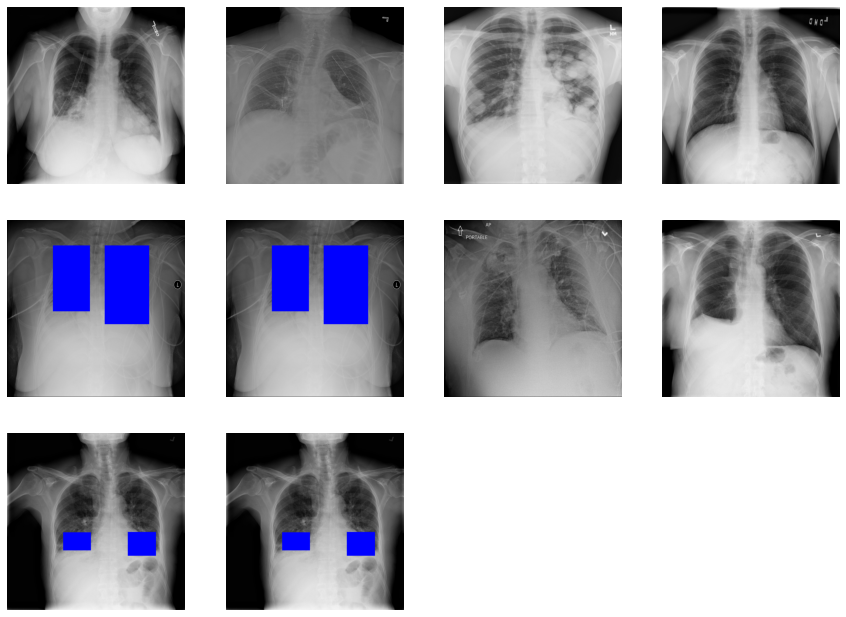

In [27]:
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.subplot(4,4,i+1)
  img = pydicom.dcmread(f'{os.path.join(Train_path, tempdata["patientId"][i])}.dcm').pixel_array
  if len(img.shape) != 3 or img.shape[2] != 3:
      img = np.stack((img,)*3, -1)
      # img = cv2.resize(img, dsize = (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  blue = [0,0,255]
  if tempdata["patientId"][i] in opacityLoc:
      for location in opacityLoc[tempdata["patientId"][i]]:
        x1,y1,w,h = location
        y2 = y1 + h
        x2 = x1 + w
        img[y1: y1 , x1:x2] = blue; 
        img[y1: y2 , x1:x2] = blue;
        img[y1: y1 , x1:x1] = blue;
        img[y1: y2 , x1:x1] = blue;       
  plt.imshow(img, cmap = plt.cm.gist_gray)    
  plt.axis("off")         

In [28]:
class imageGenerator(Sequence):
  def __init__(self, folder, filenames,pneumonia_locations=None, batch_size = 24, image_size = 128, shuffle = True,augment=False, predict = False):
    self.folder = folder
    self.filenames = filenames
    self.pneumonia_locations = pneumonia_locations
    self.batch_size = batch_size
    self.image_size = image_size
    self.shuffle = shuffle
    self.augment = augment
    self.predict = predict
    if self.shuffle:
      random.shuffle(self.filenames)
  def __len__(self):
    return int(len(self.filenames)/self.batch_size)
  def __load__(self, filename):
    img = pydicom.dcmread(os.path.join(self.folder,filename)).pixel_array
    msk = np.zeros(img.shape)
    filename = filename.split('.')[0]
    if filename in self.pneumonia_locations:
      for location in self.pneumonia_locations[filename]:
        x,y,w,h = location
        msk[y:y+h, x:x+w] = 1
    if self.augment and random.random() > 0.5:
      img = np.fliplr(img)
      msk = np.fliplr(msk)
    msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # add trailing channel dimension
    msk = np.expand_dims(msk, -1)
    if len(img.shape) != 3 or img.shape[2] != 3:
      img = np.stack((img,) * 3, -1)
      img = cv2.resize(img, dsize=(self.image_size, self.image_size), interpolation=cv2.INTER_CUBIC)   
    return img, msk     
  def __loadimages__(self, filename):
    img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        #img = resize(img, (self.image_size, self.image_size), mode='reflect')
        #Converting Image from GrayScale to RGB 
    if len(img.shape) != 3 or img.shape[2] != 3:
          img = np.stack((img,) * 3, -1)
          img = cv2.resize(img, dsize=(self.image_size, self.image_size), interpolation=cv2.INTER_CUBIC)
    return img
  def __getitem__(self, index):
    filenames = self.filenames[index * self.batch_size:(index+1)*self.batch_size]
    if self.predict:
      imgs = [self.__loadimages__(filename) for filename in filenames]
      imgs = np.array(imgs)
      return imgs, filenames
    else:
      data = [self.__load__(filename) for filename in filenames]
      imgs, msks = zip(*data)
      imgs = np.array(imgs)
      msks = np.array(msks)
      return imgs, msks

In [29]:
Train_gen = imageGenerator(Train_path, trainSamples, opacityLoc, batch_size = batchSize, image_size = image_size, shuffle = True, augment=True, predict = False)
valid_gen = imageGenerator(Train_path, validationSamples, opacityLoc, batch_size = batchSize, image_size = image_size, shuffle = False, predict = False)

In [ ]:
# from torch.utils.data import Dataset, DataLoader
# train = DataLoader(Train_gen, batch_size = batchSize)
# print(train)

In [30]:
def iou_loss(Ground_T, Pred_T):
  Ground_T = tf.reshape(Ground_T, [-1])
  Pred_T = tf.reshape(Pred_T, [-1])
  intersect = tf.reduce_sum(Ground_T * Pred_T)
  score = (intersect + 1.)/ (tf.reduce_sum(Ground_T) + tf.reduce_sum(Pred_T) - intersect + 1.)
  return 1-score

def mean_iou(Ground_T, Pred_T):
  Pred_T = tf.round(Pred_T)
  intersect =  tf.reduce_sum(Ground_T*Pred_T, axis = [1,2,3])
  union = tf.reduce_sum(Ground_T, axis= [1,2,3]) + tf.reduce_sum(Pred_T, axis = [1,2,3])
  smooth = tf.ones(tf.shape(intersect))
  return tf.reduce_mean((intersect + smooth)/ (union - intersect + smooth))

def  bce_iou_loss(Ground_T, Pred_T):
  if Ground_T.dtype == 'bool':
    Ground_T = tf.cast(Ground_T, tf.float32)
  return 0.5* keras.losses.binary_crossentropy(Ground_T, Pred_T) + 0.5* iou_loss(Ground_T, Pred_T)



ResNet-50 Model

In [31]:
import keras
import pickle

In [ ]:
# def resNet50_model():
# img_height = 256
#   input = keras.layers.Input(shape=(img_width,img_height, 3))
#   output = keras.layers.ZeroPadding2D(padding=3, name = 'padding_conv1')(input)
#   output = keras.layers.Conv2D(64,(7,7), strides=(2,2), use_bias= false, name = 'conv1')
#   output

In [32]:
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
!pip install opencv-python
import cv2
keras = tf.compat.v1.keras

In [33]:
from tensorflow.keras import Sequential, backend as K
#from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Concatenate, UpSampling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
def MLModel():
  model = Sequential()
  model.add(ResNet50(input_shape= (img_width, img_height, 3), include_top=False, weights='imagenet'))
  model.add(Dense(1024, activation='relu'))
  model.add(UpSampling2D())
  model.add(Dense(512, activation='relu'))
  model.add(UpSampling2D())
  model.add(Dense(256, activation='relu'))
  model.add(UpSampling2D())
  model.add(Dense(64, activation='relu'))
  model.add(UpSampling2D())
  model.add(Dense(8, activation='relu'))
  model.add(UpSampling2D())
  model.add(Dense(1, activation='sigmoid'))
  # model.add(Flatten())
  # model.add(Dense(3, activation='softmax'))
  model.layers[0].trainable = False
  print(model.summary())
  return model


In [ ]:
# model = MLModel()
# model.compile(optimizer='Adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy', mean_iou])

In [ ]:
# history = model.fit(Train_gen, validation_data = valid_gen, epochs=5, steps_per_epoch =15, shuffle=True)

In [ ]:
# plt.figure(figsize = (16,4))
# plt.subplot(141)
# plt.plot(history.epoch, history.history["loss"], label = "Train loss information")
# plt.plot(history.epoch, history.history["val_loss"], label = "Validation loss information")
# plt.legend()
# plt.subplot(142)
# plt.plot(history.epoch, history.history["mean_iou"], label = "Train mean loss information")
# plt.plot(history.epoch, history.history["val_mean_iou"], label = "Validation mean loss information")
# plt.legend()
# plt.show()

In [ ]:
# Ioumodel = MLModel()
# Ioumodel.compile(optimizer='Adam',
#               loss= bce_iou_loss,
#               metrics=['accuracy', mean_iou])
# IOUhistory = Ioumodel.fit(Train_gen, validation_data = valid_gen, epochs=5, steps_per_epoch =15, shuffle=True)

In [ ]:
# plt.figure(figsize = (16,4))
# plt.subplot(141)
# plt.plot(IOUhistory.epoch, IOUhistory.history["loss"], label = "Train loss information")
# plt.plot(IOUhistory.epoch, IOUhistory.history["val_loss"], label = "Validation loss information")
# # plt.legend()
# plt.subplot(142)
# plt.plot(IOUhistory.epoch, IOUhistory.history["mean_iou"], label = "Train mean IOU loss information")
# plt.plot(IOUhistory.epoch, IOUhistory.history["val_mean_iou"], label = "Validation mean IOU loss information")
# plt.legend()
# plt.show()

Early Stop


In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor = 'val_loss', patience = 2)

reduceLROn = ReduceLROnPlateau(monitor = 'val_loss', factor =0.8, patience = 2, verbose =1, mode = 'auto', cooldown = 3)

In [ ]:
Ioumodel = MLModel()
Ioumodel.compile(optimizer='Adam',
              loss= "binary_crossentropy",
              metrics=['accuracy'])
IOUhistory = Ioumodel.fit(Train_gen, validation_data = valid_gen,callbacks=[earlystop, reduceLROn], epochs=5, steps_per_epoch =64,shuffle=True)

94773248/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
dense (Dense)                (None, 4, 4, 1024)        2098176   
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 1024)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 8, 8, 512)         524800    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 512)       0         
_________________________________________________________________
dense_2 (Dense)              (None, 16, 16, 256)       131328    
_________________________________________________________

In [ ]:
Ioumodel.save('/content/drive/My Drive/ProjectDataset/Ioumodel.h5')

In [1]:
Ioumodel.save('/content/drive/My Drive/ProjectDataset/Ioumodel2.h5')

NameError: ignored

In [ ]:
plt.figure(figsize = (16,4))
plt.subplot(141)
plt.plot(IOUhistory.epoch, IOUhistory.history["loss"], label = "Train loss information")
plt.plot(IOUhistory.epoch, IOUhistory.history["val_loss"], label = "Validation loss information")
plt.legend()
plt.subplot(142)
plt.plot(IOUhistory.epoch, IOUhistory.history["mean_iou"], label = "Train mean IOU information")
plt.plot(IOUhistory.epoch, IOUhistory.history["val_mean_iou"], label = "Validation mean IOU information")
plt.legend()
plt.subplot(143)
plt.plot(IOUhistory.epoch, IOUhistory.history["accuracy"], label = "Train accuracy information")
plt.plot(IOUhistory.epoch, IOUhistory.history["val_accuracy"], label = "Validation accuracy information")
plt.legend()
plt.show()

In [ ]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.initializers import glorot_uniform
def identity_block(X, f, filters):
  F1, F2, F3 = filters
  X_shortcut = X
  X = Conv2D(filters = F1, kernel_size = (1,1), strides = (1,1), padding = 'valid')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)
  return X

def convolutional_block(X, f, filters, s= 2):
  F1, F2, F3 = filters
  X_shortcut = X
  X = Conv2D(F1, (1,1), strides = (s,s))(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid')(X)
  X = BatchNormalization(axis = 3)(X)
  X_shortcut = Conv2D(filters = F3, kernel_size = (1,1), strides = (s,s), padding = 'valid')(X_shortcut)
  X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)
  return X

def Resnet50(input_shape = (128, 128, 3), classes = 2):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    X = Conv2D(64, (7,7),strides = (2,2))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3), strides = (2,2))(X)
    X = convolutional_block(X, f=3, filters = [64,64,256], s=2)
    X = identity_block(X, 3, [64,64,256])
    X = identity_block(X, 3, [64,64,256])
    X = convolutional_block(X, f=3, filters = [128,128,512], s=2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = convolutional_block(X, f=3, filters = [256,256,1024], s=2)
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = convolutional_block(X, f=3, filters = [512,512,2048], s=2)
    X = identity_block(X, 3, [512,512,2048])
    X = identity_block(X, 3, [512,512,2048])
    X = AveragePooling2D((2,2),name = "avg_pool")(X)
    X = Flatten()(X)
    X = Dense(classes, activation = "softmax", name = str(classes), kernel_initializer = glorot_uniform(seed = 0))(X)
    model = Model(inputs = X_input, outputs = X, name = 'Resnet50')
    return model


In [ ]:
model = Resnet50(input_shape = (128,128,3), classes = 3)
model.compile(optimizer='Adam',
              loss= bce_iou_loss,
              metrics=['accuracy', mean_iou])
model.summary()

In [ ]:
reshistory = model.fit_generator(Train_gen, validation_data=valid_gen, callbacks=[earlystop, reduceLROn], epochs=5,shuffle=True)

In [ ]:
plt.figure(figsize = (16,4))
plt.subplot(141)
plt.plot(reshistory.epoch, reshistory.history["loss"], label = "Train loss information")
plt.plot(reshistory.epoch, reshistory.history["val_loss"], label = "Validation loss information")
plt.legend()
plt.subplot(142)
plt.plot(reshistory.epoch, reshistory.history["mean_iou"], label = "Train mean IOU information")
plt.plot(reshistory.epoch, reshistory.history["val_mean_iou"], label = "Validation mean IOU information")
plt.legend()
plt.subplot(143)
plt.plot(reshistory.epoch, reshistory.history["accuracy"], label = "Train accuracy information")
plt.plot(reshistory.epoch, reshistory.history["val_accuracy"], label = "Validation accuracy information")
plt.legend()
plt.show()

SVM bases classifier


StreamLit


In [ ]:
import tqdm
from tqdm import tqdm_notebook

Testing


In [42]:
TestSamples = os.listdir(Test_path)
print(len(TestSamples))
print(TestSamples)
Test_gen = imageGenerator(Test_path, TestSamples,  opacityLoc, batch_size = batchSize, image_size = image_size, shuffle = False, predict = True)
print(len(Test_gen))
submission_dict = {}
for imgs, filenames in Test_gen:
  preds = Ioumodel.predict(imgs)
  for pred, filename in zip(preds, filenames):
    # resize predicted mask
    pred = resize(pred, (1024, 1024), mode='reflect')
    # threshold predicted mask
    comp = pred[:, :, 0] > 0.5
    # apply connected components
    comp = measure.label(comp)
    # apply bounding boxes
    predictionString = ''
    for region in measure.regionprops(comp):
        # retrieve x, y, height and width
        y, x, y2, x2 = region.bbox
        height = y2 - y
        width = x2 - x
        # proxy for confidence score
        conf = np.mean(pred[y:y+height, x:x+width])
        # add to predictionString
        predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
    # add filename and predictionString to dictionary
    filename = filename.split('.')[0]
    submission_dict[filename] = predictionString
# stop if we've got them all
  if len(submission_dict) >= len(TestSamples):
    break

3000
['26902670-d4e8-44e4-b750-5e95cf9dd3d6.dcm', '2657b0a9-63ec-43b2-810e-b665f879f309.dcm', '2544328a-3855-4ccc-8aa5-90283213749c.dcm', '25b057bc-7363-4904-81f3-92c50d94486f.dcm', '265f1a4a-fee4-447e-9709-0fff15f2255b.dcm', '25d2e423-40f3-4c47-becd-e05908e3ced4.dcm', '24fe325a-be98-405e-bbf5-cbe64aa82e5c.dcm', '261c2f87-c4e3-461e-b6eb-e9a01dd3d4c1.dcm', '2616499c-8097-43cd-8864-575ba5d4d932.dcm', '26bf3493-da59-49e0-a702-eaa7bf823a91.dcm', '252437ed-a4e2-4743-995c-65a4bb133996.dcm', '24e94313-04e5-4550-a937-b67d1eea6796.dcm', '252841f2-7c5e-4554-8181-0c651a885d41.dcm', '26a068d0-e410-4b4e-a5fc-0bcc9bb4f035.dcm', '26cd4988-ff71-4d30-b36a-99645c022f90.dcm', '26a8c9e0-13ee-4c48-924c-b7a7fe0ba83e.dcm', '258b9d9a-79c8-40eb-a502-d4c07648ed2e.dcm', '2664366f-4f04-49e1-ab20-19b9173f23bc.dcm', '252e33a2-395e-4abd-bc4b-b67e6e8e7fdf.dcm', '263db843-751f-4cd1-b392-548fe40d2636.dcm', '26aff776-ff9d-40f2-b899-6b88f1355506.dcm', '2539614e-1dc5-4ef7-8381-7f113b5fabc2.dcm', '2696d094-0bf0-47b5-bf0a-1

In [44]:
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission_valbyRESNET50-1.csv')

In [ ]:
sample_submission_fp = '/content/drive/My Drive/ProjectDataset/sample_submission2.csv'
predict(test_image_fps[:50], filepath=sample_submission_fp)

In [ ]:
TestSamples = os.listdir(Test_path)
print(len(TestSamples))
print(TestSamples)
Test_gen = imageGenerator(Test_path, TestSamples, batch_size = batchSize, image_size = image_size, shuffle = False, predict = True)


In [ ]:
for file in TestSamples:
  img =  pydicom.dcmread(os.path.join(Test_path,file)).pixel_array
  if len(img.shape) != 3 or img.shape[2] != 3:
      img = np.stack((img,)*3, axis= 2)
      img = cv2.resize(img, dsize = (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  result = Ioumodel.predict([img])
  print(result[0])

CNN Based Model

In [ ]:
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
class Configuration:
    EPOCHS = 5
    LEARNING_RATE = 0.001
    BATCH = 32
    IMAGE_SIZE = 64
    CHANNLES = 32
    N_BLOCKS = 2
    NN_DEPTH = 4
    WORKERS = 4
    TRAIN_IMAGES_SIZE = 500 
    VALID_IMAGES_SIZE = 200

In [ ]:
class generator(keras.utils.Sequence):
    
    # Construcor to initialize the object's properties
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5: 
            img = np.fliplr(img)  
            msk = np.fliplr(msk) 
        # add trailing channel dimension
        img = np.expand_dims(img, -1) 
        msk = np.expand_dims(msk, -1) 
        # print('Load method img size {0} and msk size is {1}'.format(img.shape, msk.shape))
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        #print('LoadPredict method img size {0}'.format(img.shape))
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            #print('GetItem method and predict is true img size {0} and total filenames are {1}'.format(img.shape, len(filenames)))
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            #print('GetItem method and predict is false img size {0} and mask size {1}'.format(imgs.shape, msks.shape))
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            #print('Len method and predict is true and values {0}'.format(int(np.ceil(len(self.filenames) / self.batch_size))))
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            #print('Len method and predict is false and values {0}'.format(int(len(self.filenames) / self.batch_size)))
            return int(len(self.filenames) / self.batch_size)

In [ ]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
#     if type(y_true) == 'bool':
#         print(' type is bool')
#     print(y_true.dtype == 'bool')
#     print(y_true)
#     print(y_pred)
    if y_true.dtype == 'bool':
        y_true = tf.cast(y_true, tf.float32)
#     if y_pred.dtype == 'bool':
#         y_pred = tf.cast(y_pred, tf.float32)
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred) 

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))
def cosine_annealing(x):
    lr = Configuration.LEARNING_RATE
    epochs = Configuration.EPOCHS
    return lr*(np.cos(np.pi*x/epochs)+1.)/2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

In [ ]:
model = create_network(input_size = Configuration.IMAGE_SIZE, channels = Configuration.CHANNLES, n_blocks = Configuration.N_BLOCKS, depth = Configuration.NN_DEPTH)
model.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])
model.summary()
folder = Train_path
train_gen = generator(folder, trainSamples, opacityLoc, batch_size=Configuration.BATCH, image_size=Configuration.IMAGE_SIZE, shuffle=True, augment=True, predict=False)
valid_gen = generator(folder, validationSamples, opacityLoc, batch_size=Configuration.BATCH, image_size=Configuration.IMAGE_SIZE, shuffle=False, predict=False)
history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=Configuration.EPOCHS,steps_per_epoch =15,validation_steps=10, workers=Configuration.WORKERS, use_multiprocessing=True)

In [ ]:
model.save('/content/drive/My Drive/ProjectDataset/Model.h5')

In [ ]:
plt.figure(figsize = (16,4))
plt.subplot(141)
plt.plot(history.epoch, history.history["loss"], label = "Train loss information")
plt.plot(history.epoch, history.history["val_loss"], label = "Validation loss information")
plt.legend()
plt.subplot(142)
plt.plot(history.epoch, history.history["mean_iou"], label = "Train mean IOU loss information")
plt.plot(history.epoch, history.history["val_mean_iou"], label = "Validation mean IOU loss information")
plt.legend()
plt.show()

In [ ]:
TestSamples = os.listdir(Test_path)
print(len(TestSamples))
print(TestSamples)
Test_gen = generator(Test_path, TestSamples, batch_size=Configuration.BATCH, image_size=Configuration.IMAGE_SIZE, shuffle = False, predict = True)
print(len(Test_gen))
submission_dict = {}
for imgs, filenames in Test_gen:
  preds = model.predict(imgs)
  for pred, filename in zip(preds, filenames):
    # resize predicted mask
    pred = resize(pred, (1024, 1024), mode='reflect')
    # threshold predicted mask
    comp = pred[:, :, 0] > 0.5
    # apply connected components
    comp = measure.label(comp)
    # apply bounding boxes
    predictionString = ''
    for region in measure.regionprops(comp):
        # retrieve x, y, height and width
        y, x, y2, x2 = region.bbox
        height = y2 - y
        width = x2 - x
        # proxy for confidence score
        conf = np.mean(pred[y:y+height, x:x+width])
        # add to predictionString
        predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
    # add filename and predictionString to dictionary
    filename = filename.split('.')[0]
    submission_dict[filename] = predictionString
# stop if we've got them all
  if len(submission_dict) >= len(TestSamples):
    break

In [ ]:
print(submission_dict)

In [ ]:
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission_valbyCNN.csv')

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip ngrok-stable-linux-amd64.zip.9

In [ ]:
get_ipython().system_raw('./ngrok http 8502 &')

In [ ]:
%%writefile functions.py

import keras
import numpy as np
import streamlit as st
from keras import layers, models, optimizers  # modeling
from PIL import Image
from skimage import measure

MODEL = "/content/drive/My Drive/ProjectDataset/Ioumodeltemp.h5"

@st.cache(allow_output_mutation=True)
def load_model():
    model = keras.models.load_model(MODEL, compile=True)
    return model

def preprocess_image(img):
    image = Image.open(img)
    p_img = image.resize((128, 128))
    return np.array(p_img)

def predict(model, img):
    prob = model.predict(img)
    
    component = prob[:,:,0] > 0.5
    component = measure.label(component)
    
    confidence = 0
    for area in measure.regionprops(component):
     
      y, x, y2, x2 = area.bbox
      height = y2 - y
      width = x2 - x
      confidence = np.mean(prob[y:y+height, x:x+width])
      
    if confidence > 0.5:
        prediction = True
    else:
        prediction = False

    return prob, prediction

In [ ]:
%%writefile ex.py

import streamlit as st
import numpy as np
import functions
from PIL import Image

img = st.file_uploader(label="Load X-Ray Chest image", type=['jpeg', 'jpg', 'png'], key="xray")

if img is not None:
    # Preprocessing Image
    p_img = functions.preprocess_image(img)

    if st.checkbox('Zoom image'):
      image = np.array(Image.open(img))
      st.image(image, use_column_width=True)
    else:
      st.image(p_img)

    # Loading model
    loading_msg = st.empty()
    loading_msg.text("Predicting...")
    model = functions.load_model()

    # Predicting result
    prob, prediction = functions.predict(model, p_img)

    st.write(prob)
    if prediction:
        st.markdown(unsafe_allow_html=True, body="<span style='color:red; font-size: 50px'><strong><h4>Pneumonia!</h4></strong></span>")
    else:
        st.markdown(unsafe_allow_html=True, body="<span style='color:green; font-size: 50px'><strong><h3>Healthy!</h3></strong></span>")

In [ ]:
!pip install streamlit

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

In [ ]:
!streamlit run ex.py